#### Importing Necessary Libraries 

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [9]:
warnings.filterwarnings("ignore")

In [10]:
data = pd.read_csv("Dry_Bean_Dataset.csv")
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


### Outlier Removal

In [11]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data_transformed = data.copy()
# Convert all numeric columns to float64 to avoid dtype issues
for col in numeric_cols:
    data_transformed[col] = data_transformed[col].astype('float64')

# Identify and replace outliers for each class using IQR
for bean_class in data_transformed['Class'].unique():
    # Select data for the class
    class_data = data_transformed[data_transformed['Class'] == bean_class][numeric_cols]
    
    for col in numeric_cols:
        # Calculate IQR bounds
        Q1 = class_data[col].quantile(0.25)
        Q3 = class_data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = class_data[(class_data[col] < lower_bound) | (class_data[col] > upper_bound)][col]
        
        
        # Replace outliers with median
        median_value = class_data[col].median()
        data_transformed.loc[(data['Class'] == bean_class) & 
                 ((data[col] < lower_bound) | (data[col] > upper_bound)), col] = median_value


# Display summary statistics of the modified dataset
print("\nSummary statistics of modified dataset:\n", data_transformed[numeric_cols].describe())


Summary statistics of modified dataset:
                 Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    52911.641283    854.757715       320.211501       202.106344   
std     29040.494145    213.211046        85.608842        44.614416   
min     20420.000000    524.736000       188.919160       129.576207   
25%     36373.500000    703.847000       252.994482       175.920562   
50%     44593.000000    794.941000       297.269179       192.401403   
75%     61330.000000    977.505500       376.466365       216.694772   
max    231066.000000   1869.885000       738.860154       432.589420   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13611.000000  13611.000000   13611.000000   13611.000000  13611.000000   
mean       1.581980      0.752970   53630.943281     252.991466      0.750044   
std        0.246797      0.089620   29486.610775      58.901001   

### Fix Skewness


=== SEKER ===


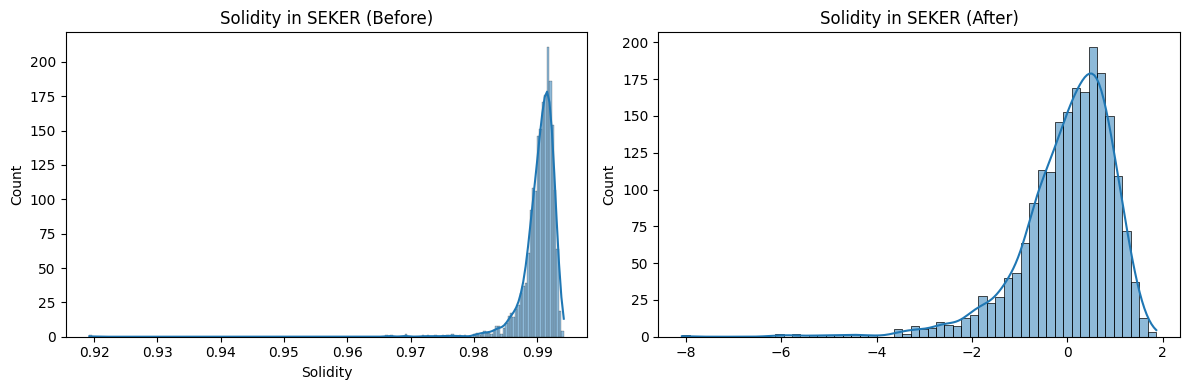

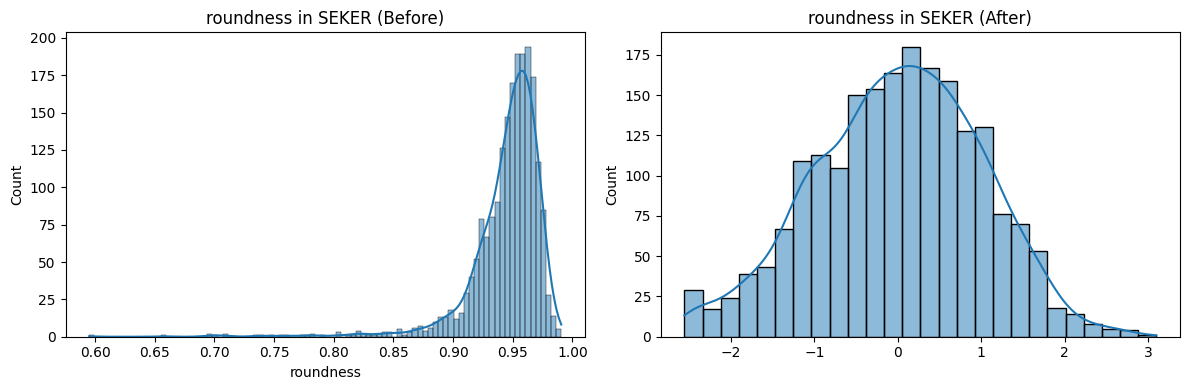

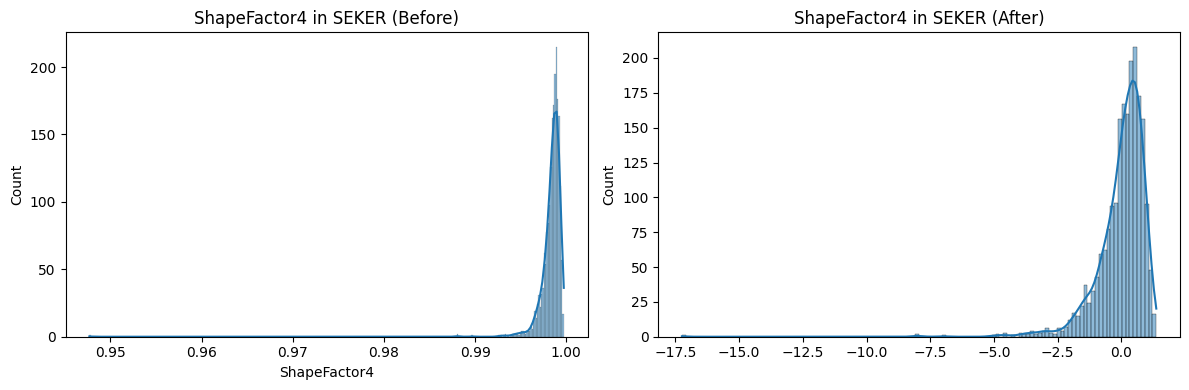


=== BARBUNYA ===


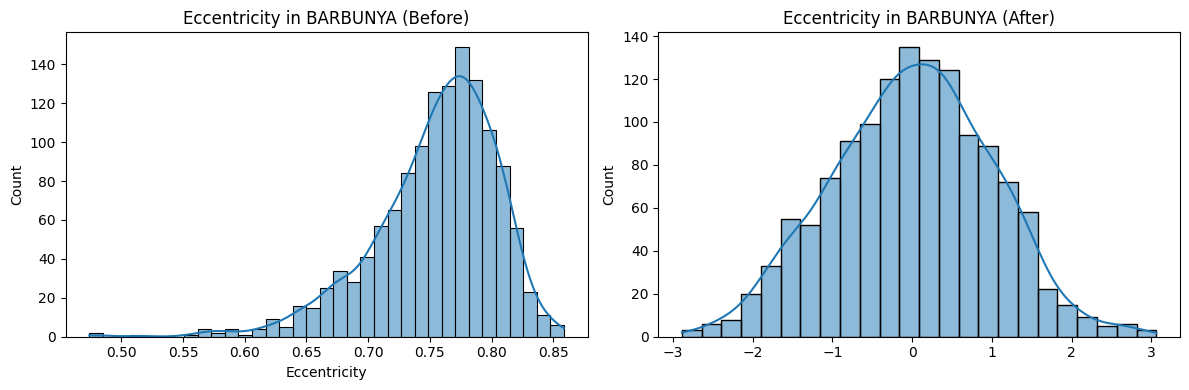

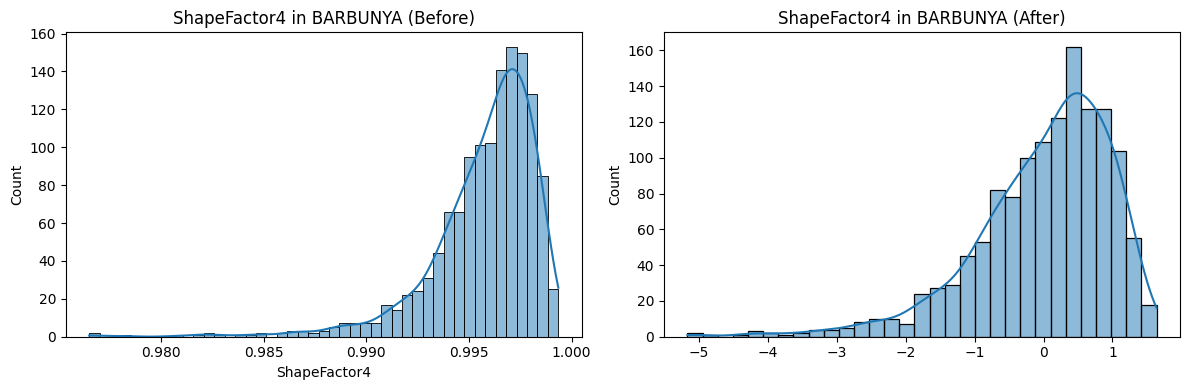


=== BOMBAY ===


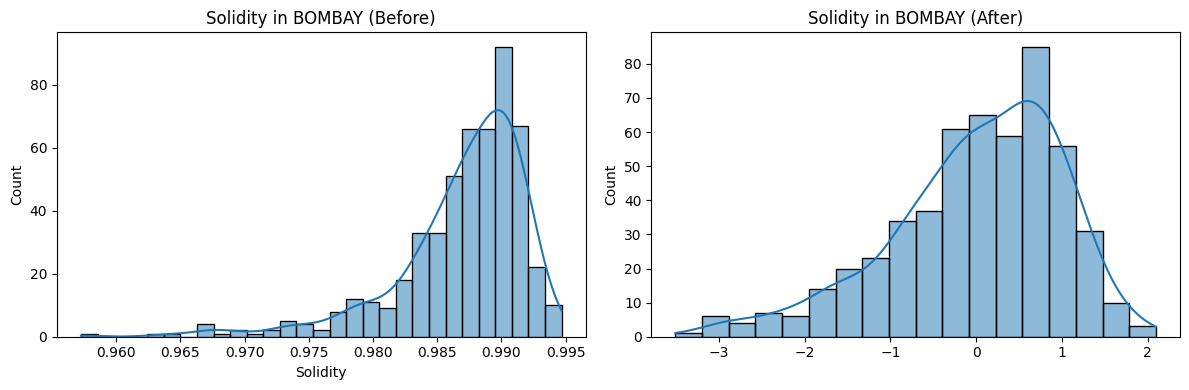

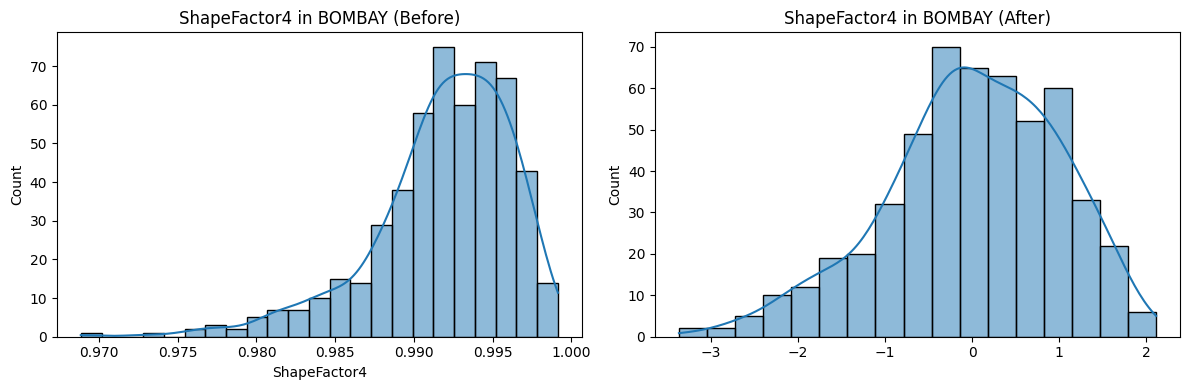


=== CALI ===


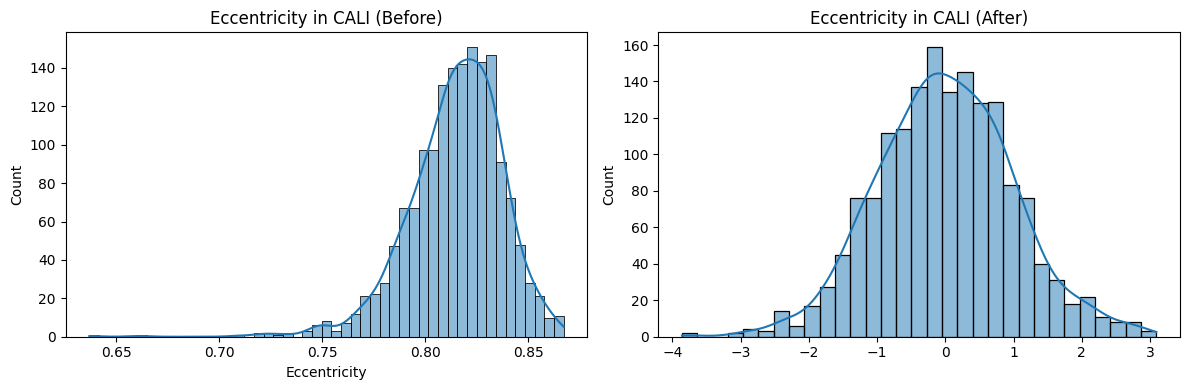

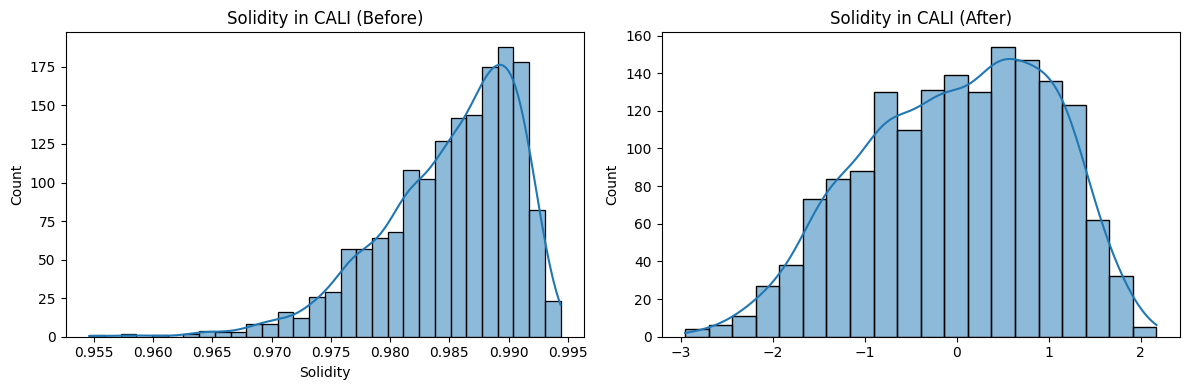

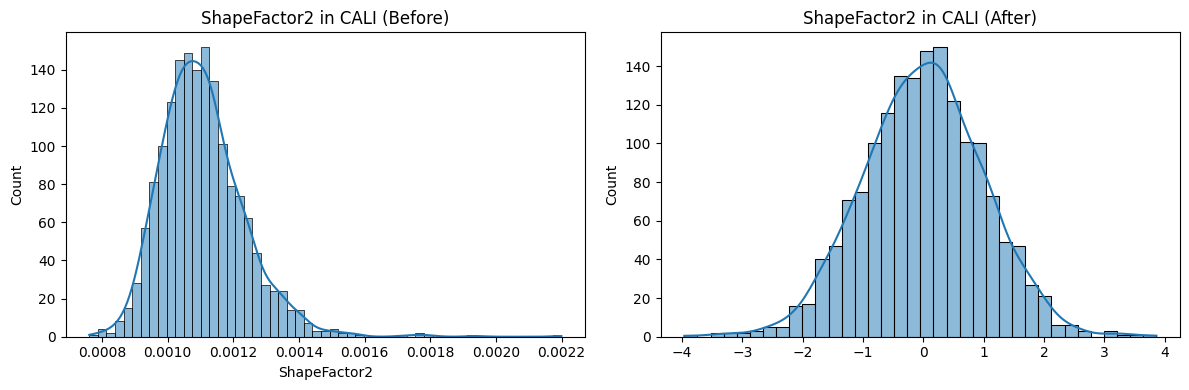

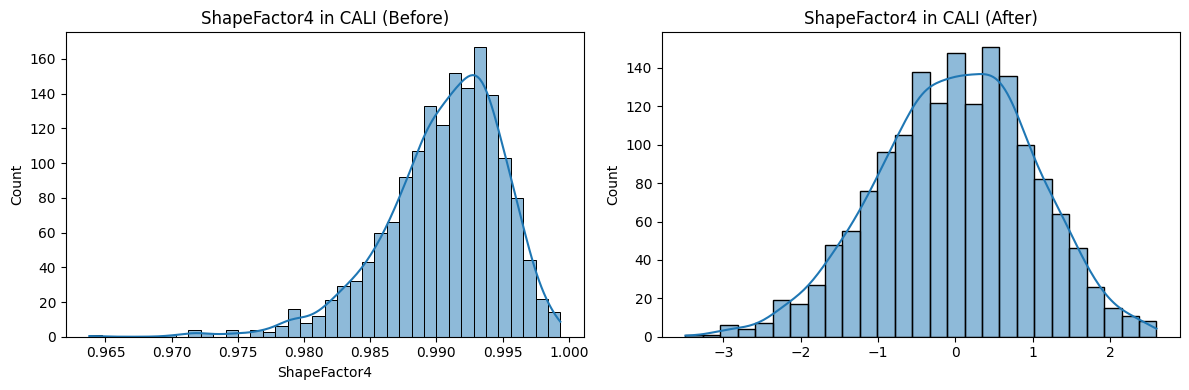


=== HOROZ ===


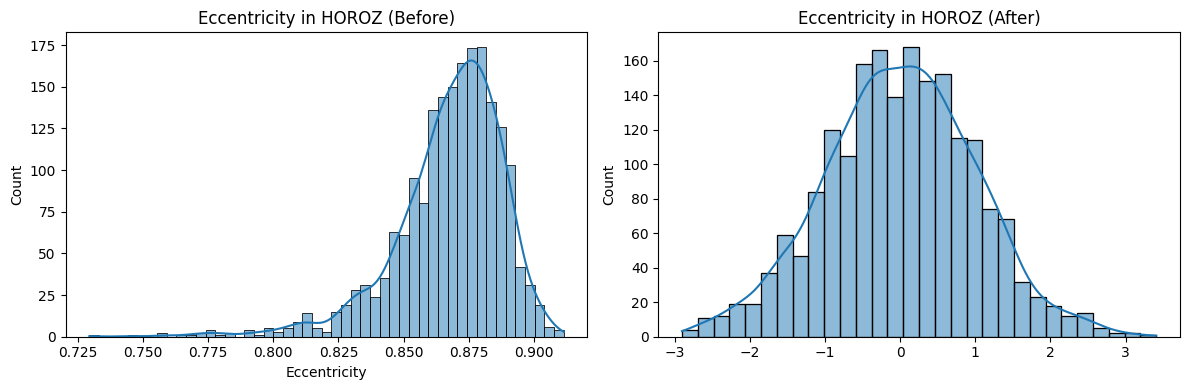

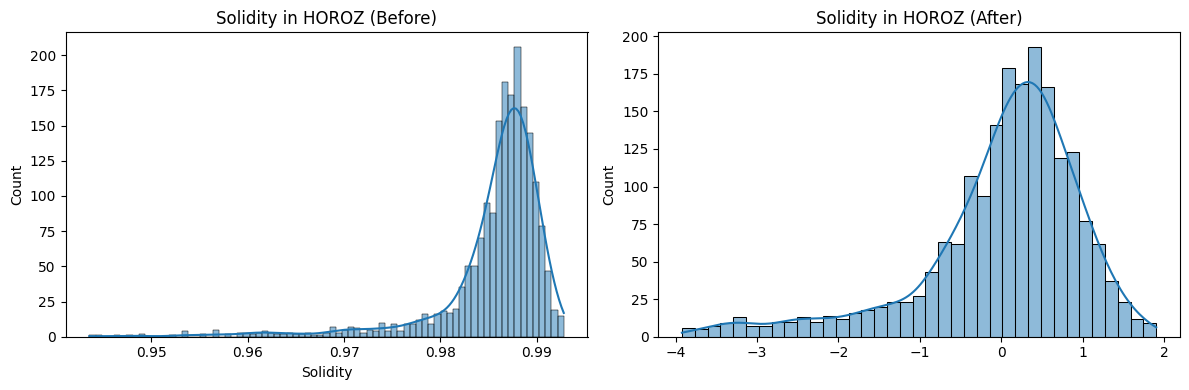

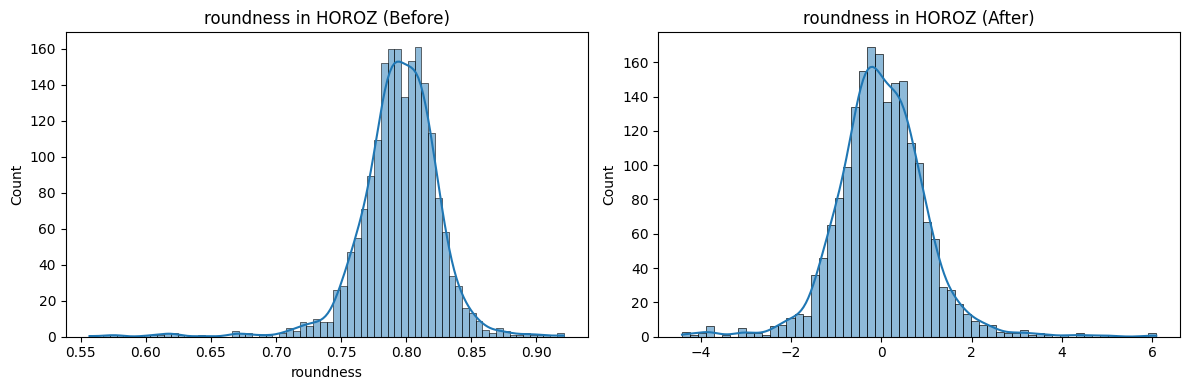

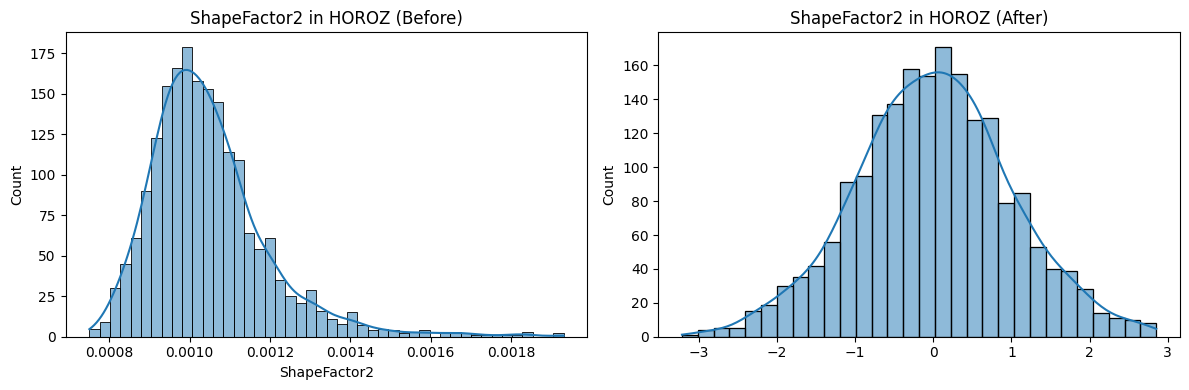

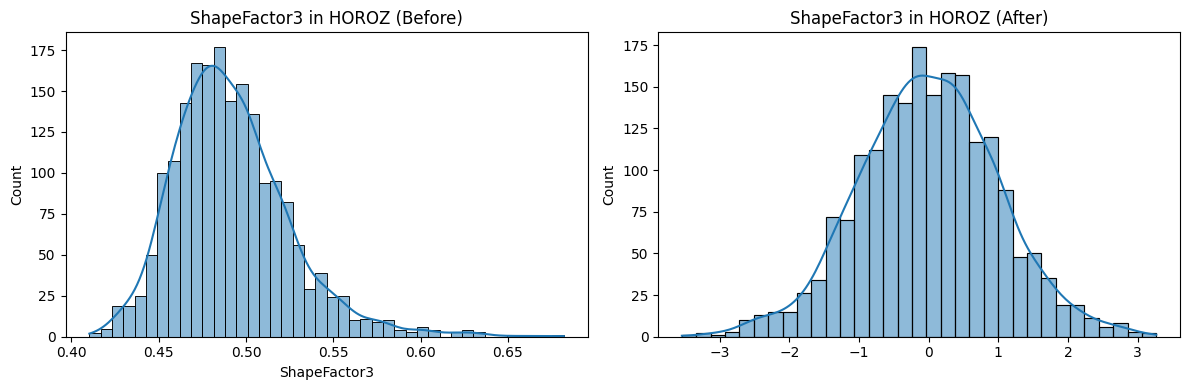

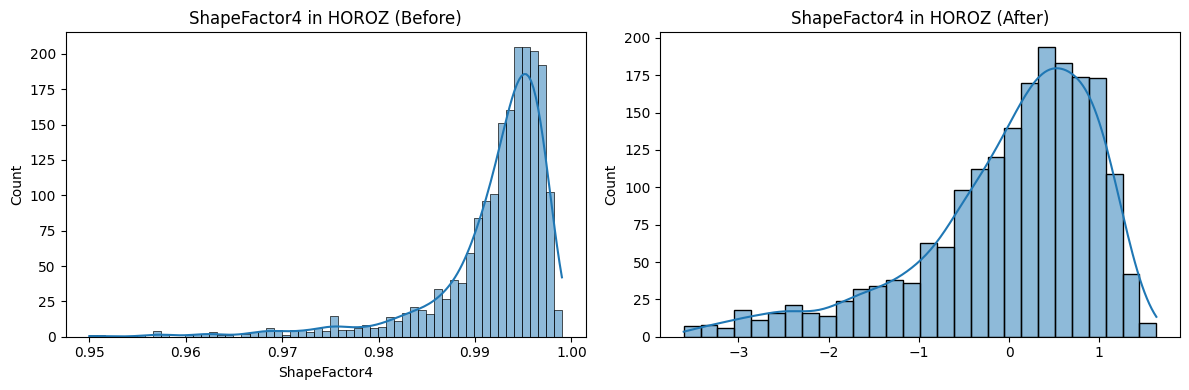


=== SIRA ===


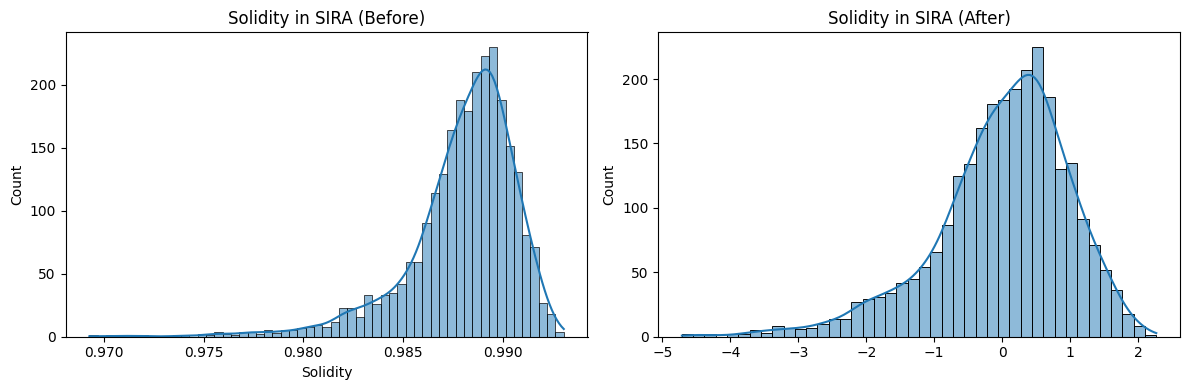

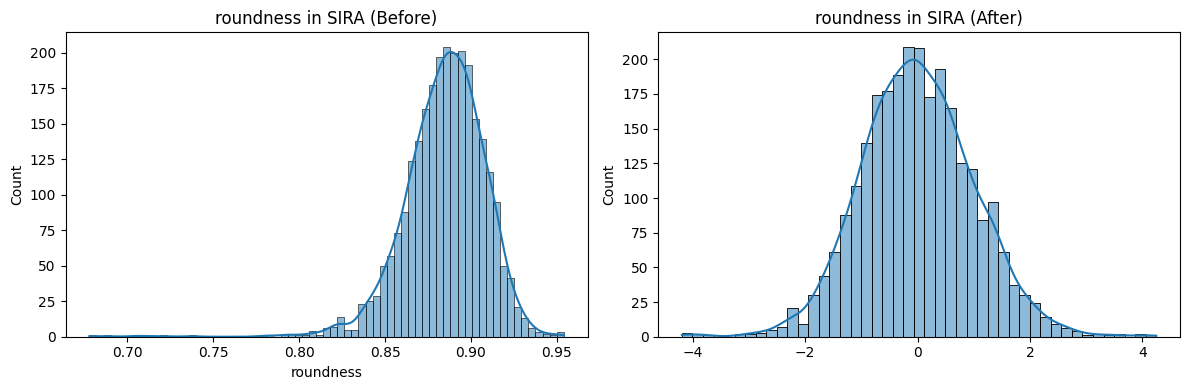

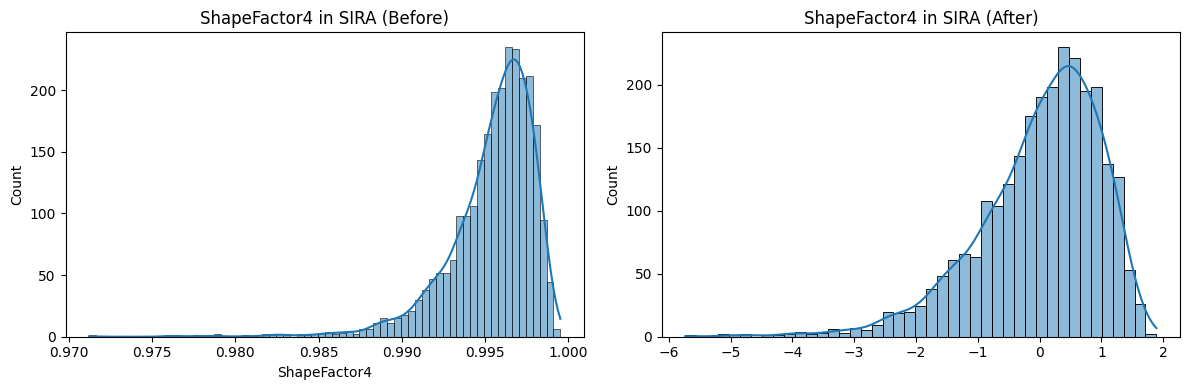


=== DERMASON ===


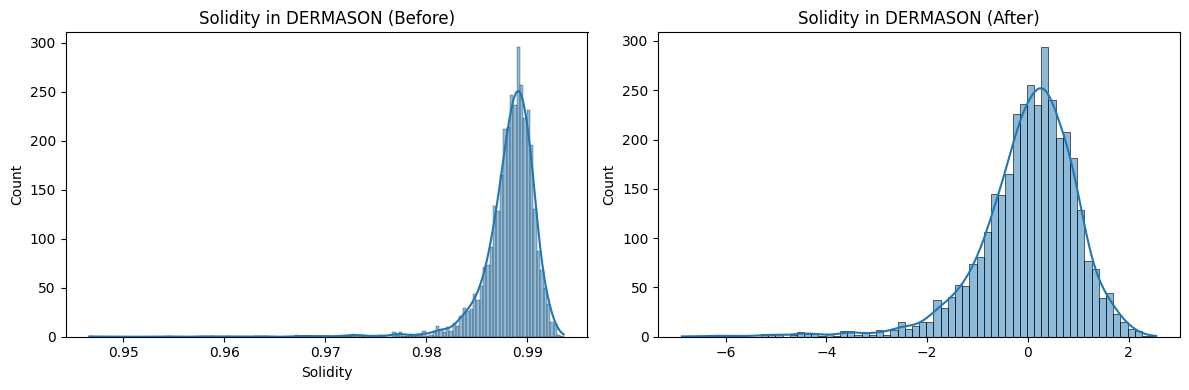

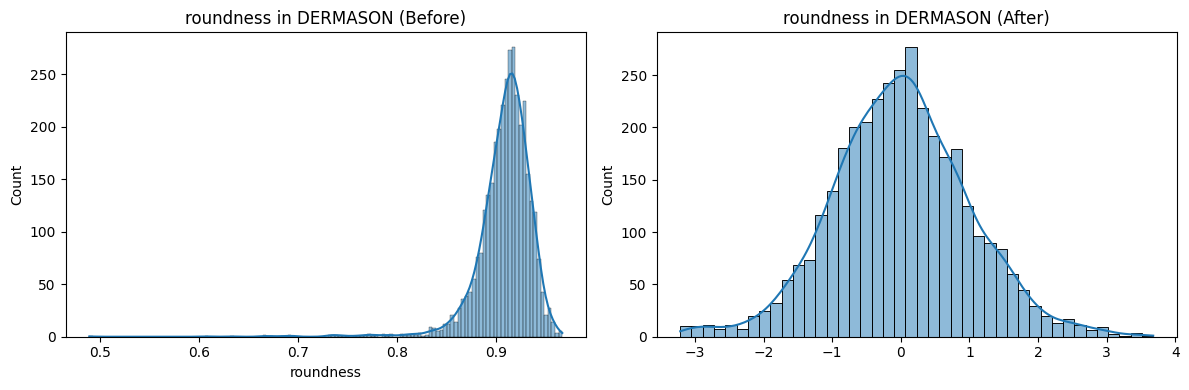

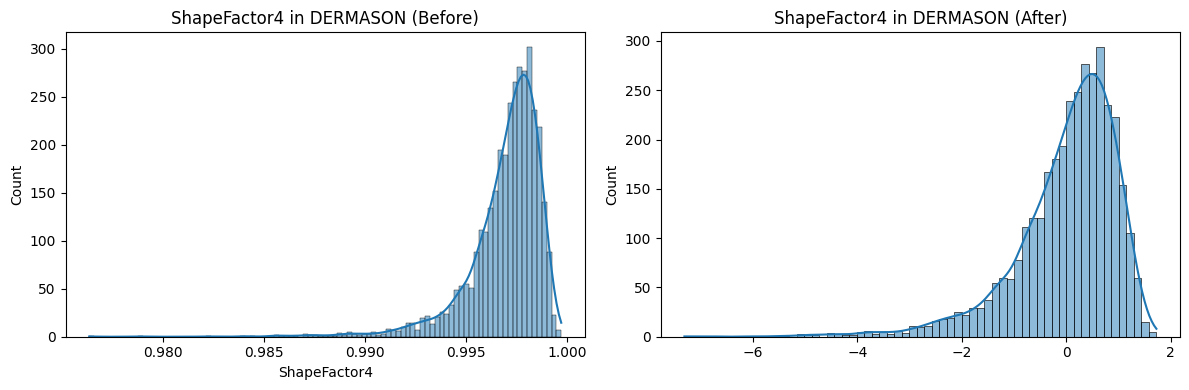


Summary statistics of modified dataset:
                 Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    52911.641283    854.757715       320.211501       202.106344   
std     29040.494145    213.211046        85.608842        44.614416   
min     20420.000000    524.736000       188.919160       129.576207   
25%     36373.500000    703.847000       252.994482       175.920562   
50%     44593.000000    794.941000       297.269179       192.401403   
75%     61330.000000    977.505500       376.466365       216.694772   
max    231066.000000   1869.885000       738.860154       432.589420   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13611.000000  13611.000000   13611.000000   13611.000000  13611.000000   
mean       1.581980      0.458298   53630.943281     252.991466      0.750044   
std        0.246797      0.693080   29486.610775      58.901001   

In [12]:
from sklearn.preprocessing import PowerTransformer

# Select numerical features
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Function to display histograms before and after transformation
def plot_histogram(feature, class_name, before, after):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(before, kde=True)
    plt.title(f"{feature} in {class_name} (Before)")
    plt.subplot(1, 2, 2)
    sns.histplot(after, kde=True)
    plt.title(f"{feature} in {class_name} (After)")
    plt.tight_layout()
    plt.show()

# Compute and reduce skewness for each class
for bean_class in data['Class'].unique():
    print(f"\n=== {bean_class} ===")
    
    # Select data for the current class
    class_data = data[data['Class'] == bean_class][numeric_cols]
    
    # Compute skewness before transformation
    skewness_before = class_data.skew()
    
    # Apply Yeo-Johnson transformation to highly skewed features
    transformer = PowerTransformer(method='yeo-johnson', standardize=True)
    for col in numeric_cols:
        if abs(skewness_before[col]) > 1:  # Only for highly skewed features
            # Transform data
            transformed_data = transformer.fit_transform(class_data[[col]])
            data_transformed.loc[data['Class'] == bean_class, col] = transformed_data.flatten()
            
            # Display histogram before and after
            plot_histogram(col, bean_class, class_data[col], transformed_data.flatten())
    
    # Compute skewness after transformation
    class_data_transformed = data_transformed[data_transformed['Class'] == bean_class][numeric_cols]
    skewness_after = class_data_transformed.skew()

print("\nSummary statistics of modified dataset:\n", data_transformed[numeric_cols].describe())

### Preprocessing

In [13]:

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = data_transformed.drop('Class', axis=1)
y = data_transformed['Class']

# Encode labels
le = LabelEncoder()
y = le.fit_transform(y)
print("Class mapping:", dict(zip(le.classes_, range(len(le.classes_)))))

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=10)  # Keep 10 components (adjust based on variance)
X_pca = pca.fit_transform(X_scaled)
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Balance dataset using ADASYN
adasyn = SMOTE(random_state=42)
X_balanced, y_balanced = adasyn.fit_resample(X_pca, y)

# Verify sample sizes
print("Number of samples in X_balanced:", X_balanced.shape[0])
print("Number of samples in y_balanced:", len(y_balanced))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
)
print("Training data size:", X_train.shape)
print("Testing data size:", X_test.shape)

Class mapping: {'BARBUNYA': 0, 'BOMBAY': 1, 'CALI': 2, 'DERMASON': 3, 'HOROZ': 4, 'SEKER': 5, 'SIRA': 6}
Explained variance ratio: [0.431642   0.19146574 0.1104863  0.10592743 0.04760955 0.03934415
 0.02606555 0.02112967 0.0169167  0.00704437]
Number of samples in X_balanced: 24822
Number of samples in y_balanced: 24822
Training data size: (19857, 10)
Testing data size: (4965, 10)


### XGBoost

In [14]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


# Define XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', num_class=7)

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1]
}


random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=50,  # Test 50 random combinations
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)
random_search.fit(X_train, y_train)
# Print best parameters and score
print("Best parameters:", random_search.best_params_)
print("Best cross-validation accuracy:", random_search.best_score_)

# Evaluate on test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test set accuracy:", accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 50 candidates, totalling 250 fits


KeyboardInterrupt: 

Time Spent: 57.5s   
Best parameters: {'subsample': 0.8, 'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}      
Best cross-validation accuracy: 0.9872085586260713      
Test set accuracy: 0.9856998992950654       

In [15]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb = XGBClassifier(eval_metric='mlogloss',
                    subsample= 0.8,
                    n_estimators= 200,
                    min_child_weight= 3,
                    max_depth= 7,
                    learning_rate= 0.1,
                    gamma= 0,
                    colsample_bytree= 0.8)

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
print("XGBoost accuracy:", accuracy_score(y_test, y_pred))

XGBoost accuracy: 0.9873111782477342


### SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
# Define SVM classifier
svm = SVC(probability=True)  # Enable probability for potential use in ensembles

# Define parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
    'class_weight': [None, 'balanced']
}

random_search = RandomizedSearchCV(
    estimator=svm,
    param_distributions=param_grid,
    n_iter=50,  # Test 50 random combinations
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

random_search.fit(X_train, y_train)

# Print best parameters and score
print("Best parameters:", random_search.best_params_)
print("Best cross-validation accuracy:", random_search.best_score_)

# Evaluate on test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test set accuracy:", accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'kernel': 'rbf', 'gamma': 0.1, 'class_weight': 'balanced', 'C': 1}
Best cross-validation accuracy: 0.9893237426528637
Test set accuracy: 0.9881168177240685


Time Spent: 2m 24.0s    
Best parameters: {'kernel': 'rbf', 'gamma': 0.1, 'class_weight': 'balanced', 'C': 1}        
Best cross-validation accuracy: 0.9893237426528637      
Test set accuracy: 0.9881168177240685       

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', 
          probability=True,
          gamma=0.1,
          class_weight="balanced",
          C=1)

svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
print("SVM acurracy:", accuracy_score(y_test, y_pred))

دقت SVM: 0.9881168177240685


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 0.5],
    'class_weight': [None, 'balanced']
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=20,  # Test 20 random combinations
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)
random_search.fit(X_train, y_train)

# Print best parameters and score
print("Best parameters:", random_search.best_params_)
print("Best cross-validation accuracy:", random_search.best_score_)

# Evaluate on test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test set accuracy:", accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'class_weight': None}
Best cross-validation accuracy: 0.9850935140797976
Test set accuracy: 0.9863041289023162


Time Spent: 2m 6.2s         
Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'class_weight': None}    
Best cross-validation accuracy: 0.9850935140797976      
Test set accuracy: 0.9863041289023162       

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# مدل Random Forest
rf = RandomForestClassifier(n_estimators=100, 
                            random_state=42,
                            min_samples_split= 2, 
                            min_samples_leaf= 1, 
                            max_features= 'sqrt', 
                            max_depth= 20, 
                            class_weight= None)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("دقت Random Forest:", accuracy_score(y_test, y_pred))

دقت Random Forest: 0.9863041289023162


--- XGBoost ---
              precision    recall  f1-score   support

    BARBUNYA       0.99      1.00      1.00       709
      BOMBAY       1.00      1.00      1.00       709
        CALI       1.00      1.00      1.00       709
    DERMASON       0.96      0.94      0.95       710
       HOROZ       1.00      1.00      1.00       709
       SEKER       0.99      1.00      1.00       709
        SIRA       0.95      0.96      0.96       710

    accuracy                           0.99      4965
   macro avg       0.99      0.99      0.99      4965
weighted avg       0.99      0.99      0.99      4965



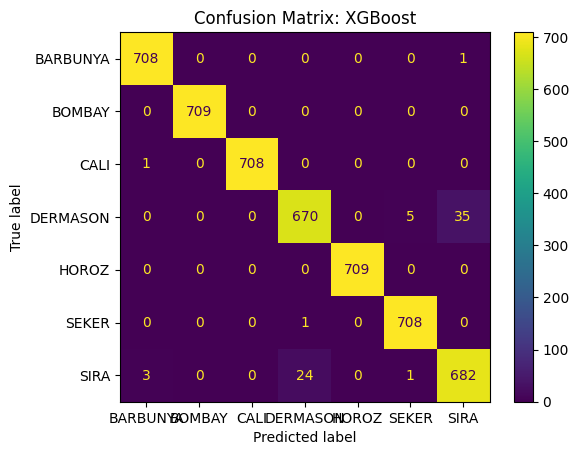

--- SVM ---
              precision    recall  f1-score   support

    BARBUNYA       1.00      1.00      1.00       709
      BOMBAY       1.00      1.00      1.00       709
        CALI       1.00      1.00      1.00       709
    DERMASON       0.97      0.95      0.96       710
       HOROZ       1.00      1.00      1.00       709
       SEKER       0.99      1.00      1.00       709
        SIRA       0.96      0.97      0.96       710

    accuracy                           0.99      4965
   macro avg       0.99      0.99      0.99      4965
weighted avg       0.99      0.99      0.99      4965



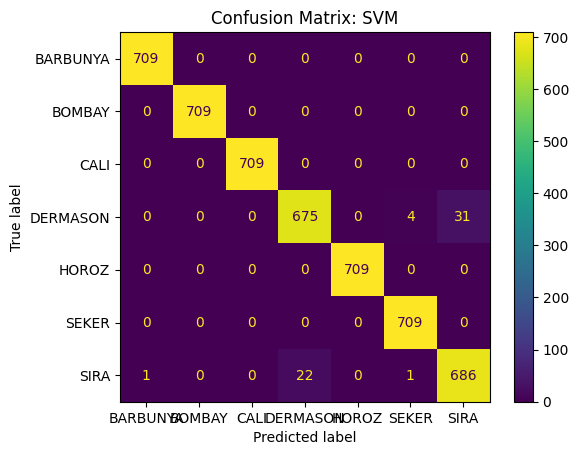

--- Random Forest ---
              precision    recall  f1-score   support

    BARBUNYA       1.00      1.00      1.00       709
      BOMBAY       1.00      1.00      1.00       709
        CALI       1.00      1.00      1.00       709
    DERMASON       0.97      0.94      0.96       710
       HOROZ       1.00      1.00      1.00       709
       SEKER       0.99      1.00      1.00       709
        SIRA       0.94      0.97      0.96       710

    accuracy                           0.99      4965
   macro avg       0.99      0.99      0.99      4965
weighted avg       0.99      0.99      0.99      4965



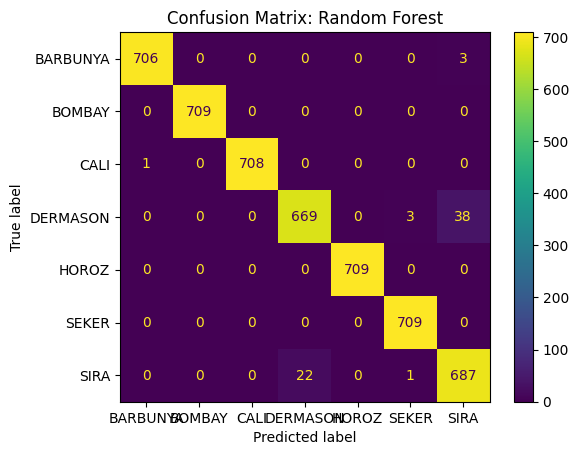


📊 Summary of Model Performance:
           Model  Accuracy  Precision    Recall  F1 Score       AUC
0        XGBoost  0.985700   0.985684  0.985700  0.985670  0.999688
1            SVM  0.988117   0.988102  0.988117  0.988093  0.999703
2  Random Forest  0.986304   0.986390  0.986304  0.986299  0.999545


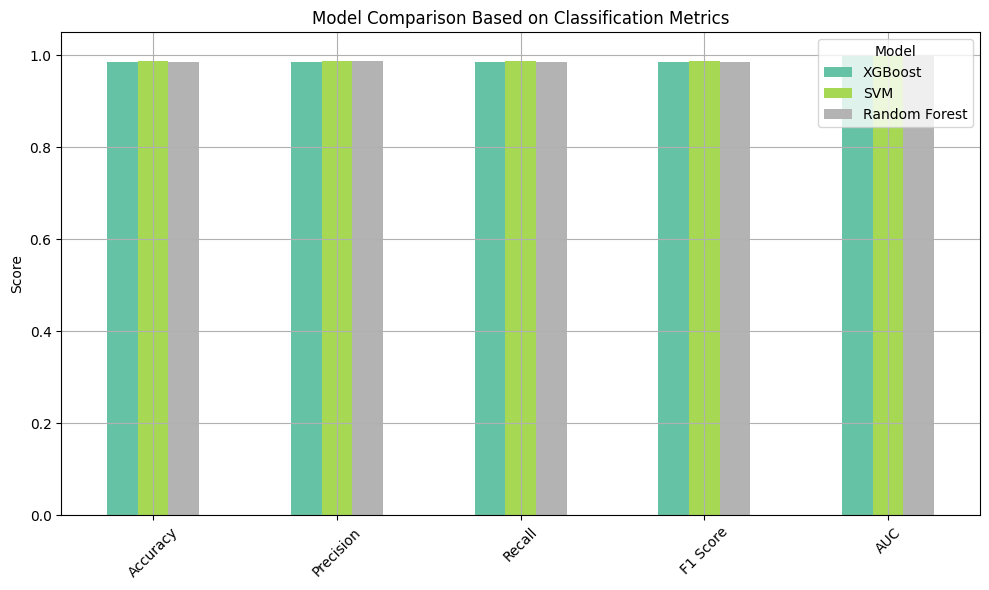

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report,
    ConfusionMatrixDisplay
)

models = {
    "XGBoost": xgb,
    "SVM": svm,
    "Random Forest": rf
}

# Train models and evaluate
results = []
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate probabilities for AUC (multi-class)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)
        auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='weighted')
    else:
        auc = np.nan

    # Calculate metrics for multi-class
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1 Score": f1_score(y_test, y_pred, average='weighted'),
        "AUC": auc
    })

    # Print classification report and display confusion matrix
    print(f"--- {name} ---")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=le.classes_)
    plt.title(f'Confusion Matrix: {name}')
    plt.show()

# Convert results to DataFrame and display
results_df = pd.DataFrame(results)
print("\n📊 Summary of Model Performance:")
print(results_df)

# Plot bar chart for comparison
results_df.set_index("Model")[["Accuracy", "Precision", "Recall", "F1 Score", "AUC"]].T.plot(
    kind="bar", figsize=(10, 6), colormap="Set2"
)
plt.title("Model Comparison Based on Classification Metrics")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## 📊 Summary of Model Performance

| Model           | Accuracy | Precision | Recall   | F1 Score | AUC      |
|----------------|----------|-----------|----------|----------|----------|
| XGBoost        | 0.961329 | 0.961493  | 0.961329 | 0.961348 | 0.998171 |
| SVM            | 0.950050 | 0.950142  | 0.950050 | 0.950072 | 0.997459 |
| Random Forest  | 0.961934 | 0.962215  | 0.961934 | 0.961991 | 0.998156 |


## 📊 Summary of Model Performance(Transformed Data)

| Model           | Accuracy | Precision | Recall   | F1 Score | AUC      |
|----------------|----------|-----------|----------|----------|----------|
| XGBoost        | 0.985700 | 0.985670  | 0.985700 | 0.985679 | 0.999699 |
| SVM            | 0.988922 | 0.988907  | 0.988922 | 0.988905 | 0.999738 |
| Random Forest  | 0.986506 | 0.986523  | 0.986506 | 0.986488 | 0.999578 |


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

models = {
    "XGBoost": xgb,
    "SVM": svm,
    "Random Forest": rf
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    print(f"{name}: Mean = {scores.mean():.3f}, Std = {scores.std():.3f}")

XGBoost: Mean = 0.991, Std = 0.001
SVM: Mean = 0.272, Std = 0.002
Random Forest: Mean = 0.980, Std = 0.002


# Model Performance Report

## Overview
This report evaluates the performance of three machine learning models—XGBoost, SVM, and Random Forest—based on key metrics: Accuracy, Precision, Recall, F1 Score, and Area Under the Curve (AUC). Additionally, cross-validation (CV) results are provided to assess model stability and generalization.

## Performance Metrics
The table below summarizes the performance metrics for each model:

| Model         | Accuracy  | Precision | Recall   | F1 Score | AUC      |
|---------------|-----------|-----------|----------|----------|----------|
| XGBoost       | 0.985700  | 0.985684  | 0.985700 | 0.985670 | 0.999688 |
| SVM           | 0.988117  | 0.988102  | 0.988117 | 0.988093 | 0.999703 |
| Random Forest | 0.986304  | 0.986390  | 0.986304 | 0.986299 | 0.999545 |

### Observations
- **SVM** achieves the highest performance across all metrics, with an accuracy of 0.988117, precision of 0.988102, recall of 0.988117, F1 Score of 0.988093, and AUC of 0.999703, making it the top-performing model.
- **Random Forest** and **XGBoost** show comparable performance, with Random Forest slightly outperforming XGBoost in accuracy (0.986304 vs. 0.985700) and precision (0.986390 vs. 0.985684).
- All models exhibit excellent discriminative ability, with AUC values close to 1.0, indicating strong performance in distinguishing between classes.

## Cross-Validation Results
Cross-validation was performed to evaluate model consistency and generalization. The mean and standard deviation (Std) of the CV scores are as follows:

- **XGBoost**: Mean = 0.991, Std = 0.001
- **SVM**: Mean = 0.272, Std = 0.002
- **Random Forest**: Mean = 0.980, Std = 0.002

### Observations
- **XGBoost** demonstrates the highest mean CV score (0.991) with a low standard deviation (0.001), indicating excellent performance and stability across folds.
- **Random Forest** also shows strong performance with a mean CV score of 0.980 and a standard deviation of 0.002, suggesting good consistency.
- **SVM** has a significantly lower mean CV score (0.272) with a standard deviation of 0.002, indicating poor generalization despite its high performance on the test set. This discrepancy suggests potential overfitting or issues with the cross-validation setup for SVM.

## Conclusion
- **SVM** is the best-performing model based on the test set metrics, with the highest accuracy, precision, recall, F1 Score, and AUC. However, its low CV score raises concerns about its generalization to unseen data, warranting further investigation.
- **XGBoost** and **Random Forest** are robust alternatives, with XGBoost showing superior stability in cross-validation and Random Forest performing slightly better on test set metrics.
- **Recommendations**:
  - Investigate the SVM model's poor CV performance to address potential overfitting or data preprocessing issues.
  - Consider ensemble approaches combining XGBoost and Random Forest to leverage their strengths.
  - Conduct further hyperparameter tuning and feature engineering to optimize model performance.

In [ ]:
import joblib

joblib.dump(model, 'xgboost_model.joblib')

['xgboost_model.joblib']